<a href="https://colab.research.google.com/github/sanaharora/EDATheoryDA/blob/main/MODEL_EVAL_(mod7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression MSE: 65.12918192477692
Linear Regression R^2: 0.5540697620321782
                            OLS Regression Results                            
Dep. Variable:              weight_kg   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     7216.
Date:                Sun, 17 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:17:56   Log-Likelihood:                -44524.
No. Observations:               13391   AIC:                         8.906e+04
Df Residuals:                   13386   BIC:                         8.909e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

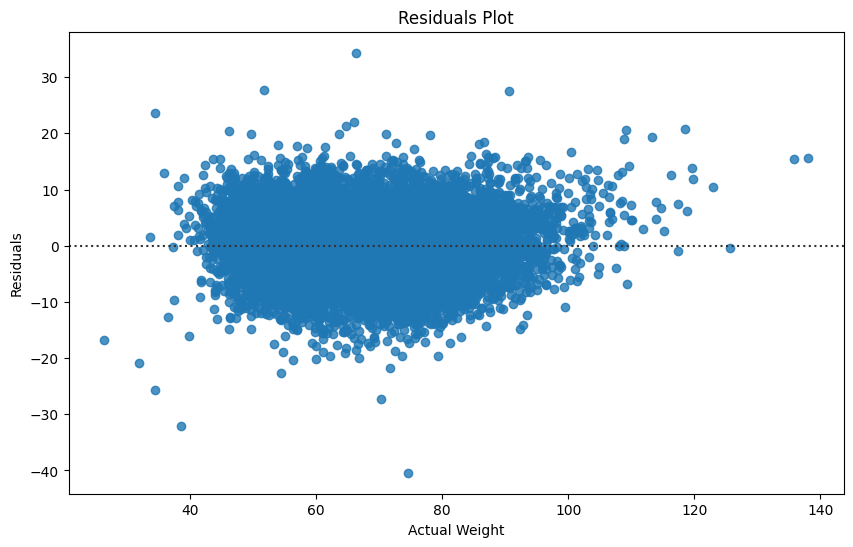

Classification Accuracy: 0.4053751399776036
Classification Precision: 0.4065859594421207
Classification Recall: 0.4053751399776036


In [10]:

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv"
df = pd.read_csv(url)

# Select numeric columns
numeric_cols = ['height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic']

# Linear Regression: Height vs Weight
X = df[['height_cm']]
y = df['weight_kg']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Linear Regression MSE:", mse)
print("Linear Regression R^2:", r2)

# Multiple Regression: Predict weight using other numeric columns
X = df[numeric_cols].drop(columns=['weight_kg'])
y = df['weight_kg']

# **Handle Missing and Infinite Values**
X = X.replace([np.inf, -np.inf], np.nan) # Replace infinite values with NaN
X = X.dropna() # Drop rows with NaN values
y = y[X.index] # Update y to match the index of X after dropping rows

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Summary of the model
print(model.summary())

# Plotting residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=y, y=model.resid)
plt.title("Residuals Plot")
plt.xlabel("Actual Weight")
plt.ylabel("Residuals")
plt.show()
